In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")
import os

#!pip install matplotlib --upgrade
import seaborn as sns

sns.set(font_scale=2)

import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from vectorize_corona import VectorizeCorona

In [8]:
DATA_PATH = "/scratch/work/luongn1/digirhythm/data/processed/corona/"
VIZ_PATH = "/scratch/work/luongn1/digirhythm/viz/"
survey = pd.read_csv(
    "/scratch/work/luongn1/digirhythm/data/interim/corona/survey_all.csv"
)

df = pd.read_csv(DATA_PATH + "corona_all_features_4epochs.csv", index_col=0)
# Filter subject with at least 28 days of data
df = df.groupby("subject_id").filter(lambda x: len(x) >= 28)
survey

,subject_id,time time,DayOnLeave,How many days in December did you spend in in-person work-related events (such as research visits; sabbatical; conferences; etc) outside of Aalto campus (either in Finland or abroad)?,PercTimeSpentOnsite,CovidDoses,In December how many days did you spend outside of Finland?,In December how many days did you spend traveling within Finland (being outside of the region(s) were you typically live and work)?,In the past two months how often have you looked at your data on the Polar app?,PSQI_Disturbance,...,PANAS_POS_During,PANAS_NEG_Pre,PANAS_POS_Pre,BIG5_Extraversion,BIG5_Agreeableness,BIG5_Conscientiousness,BIG5_Neuroticism,BIG5_Openness,MEQ,UCLA3
0,1015720192,2021-06-22 06:36:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,9,3,14,12,13,13,10,15,14,0
1,1015720192,2021-08-10 08:32:06,18.0,NaN,0.0,2,NaN,NaN,NaN,1,...,0,0,0,12,13,13,10,15,0,0
2,1015720192,2021-09-13 06:00:19,1.0,NaN,1.0,2,NaN,NaN,NaN,2,...,0,0,0,12,13,13,10,15,0,0
3,1015720192,2021-10-18 06:18:19,0.0,NaN,5.0,2,NaN,NaN,NaN,1,...,0,0,0,12,13,13,10,15,0,0
4,1015720192,2021-11-17 12:54:57,1.0,NaN,40.0,2,NaN,NaN,at-least-once-a-day,1,...,0,0,0,12,13,13,10,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,976450812,2022-06-20 12:53:45,1.0,NaN,30.0,NaN,NaN,NaN,NaN,1,...,0,5,8,9,9,7,12,15,0,8
1238,994459560,2021-06-30 09:40:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,12,8,13,5,12,12,7,8,13,0
1239,994459560,2021-09-17 14:05:21,3.0,NaN,0.0,2,NaN,NaN,NaN,1,...,0,0,0,5,12,12,7,8,0,0
1240,994459560,2021-10-17 16:18:02,0.0,NaN,0.0,2,NaN,NaN,NaN,2,...,0,0,0,5,12,12,7,8,0,0


## Distribution

In [4]:
avg_df = df.groupby("subject_id").mean(numeric_only=True)
avg_df["midsleep"] = avg_df["midsleep"] - 24
avg_df

,index_x,heart_rate_avg,beat_to_beat_avg,heart_rate_variability_avg,breathing_rate_avg,nightly_recharge_status,ans_charge,ans_charge_status,heart_rate_variability_avg:norm,steps:night,...,stepsx1000:total:norm,steps:total:norm,index_y,tst,midsleep,bedtime,waketime,total_interruption_duration,tst:norm,midsleep:norm
subject_id,,,,,,,,,,,,,,,,,,,,,
38758730,15205.428571,49.603896,1205.603896,49.234528,13.397727,3.666667,-0.626144,2.925000,0.389794,346.321429,...,0.205475,0.205475,16399.743506,7.197857,3.757532,24.158539,31.908799,1988.084416,0.516147,0.450610
91109228,17809.019608,56.345098,1062.011765,58.909804,14.939608,3.623529,-0.481961,3.035088,0.574391,177.000000,...,0.245819,0.245819,17465.733333,7.481647,4.253059,24.512196,32.608510,2212.470588,0.588779,0.331793
109662472,13865.245810,64.279330,931.324022,48.178771,13.768715,3.649718,-0.599435,2.711538,0.258278,285.044693,...,0.238048,0.238048,14891.754190,7.722961,3.974022,24.112067,32.494860,2374.357542,0.502899,0.378974
163655554,8289.226190,53.255952,1118.476190,56.732143,13.915476,3.928144,0.443713,NaN,0.494643,13.238095,...,0.199489,0.199489,13080.095238,7.466071,3.096012,23.362976,31.600952,2778.571429,0.791719,0.509681
172767574,16752.603604,57.543544,1042.873874,55.159159,12.758859,3.622356,-0.205740,2.880282,0.543593,53.564565,...,0.314562,0.314562,15676.885886,6.032282,2.818649,23.802462,30.657207,2960.450450,0.419453,0.412109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189000906,13022.053659,51.282927,1167.780488,122.682927,12.754634,3.458128,-0.435961,2.769231,0.589316,697.648780,...,0.214776,0.214776,13834.868293,6.626000,4.353024,25.039610,32.332537,2400.585366,0.392848,0.401585
4194777838,14931.993151,53.732877,1112.695205,57.095890,12.880822,3.759450,-0.367354,2.918367,0.453368,60.537671,...,0.252006,0.252006,14370.431507,7.810651,3.196507,23.291233,31.482705,1370.239726,0.442441,0.482341
4230719780,15050.807547,57.479245,1045.845283,87.670455,15.069811,3.555133,-0.619392,2.843137,0.558296,234.939623,...,0.312524,0.312524,14409.754717,6.326264,4.197434,25.034566,31.689094,1181.207547,0.366186,0.452038


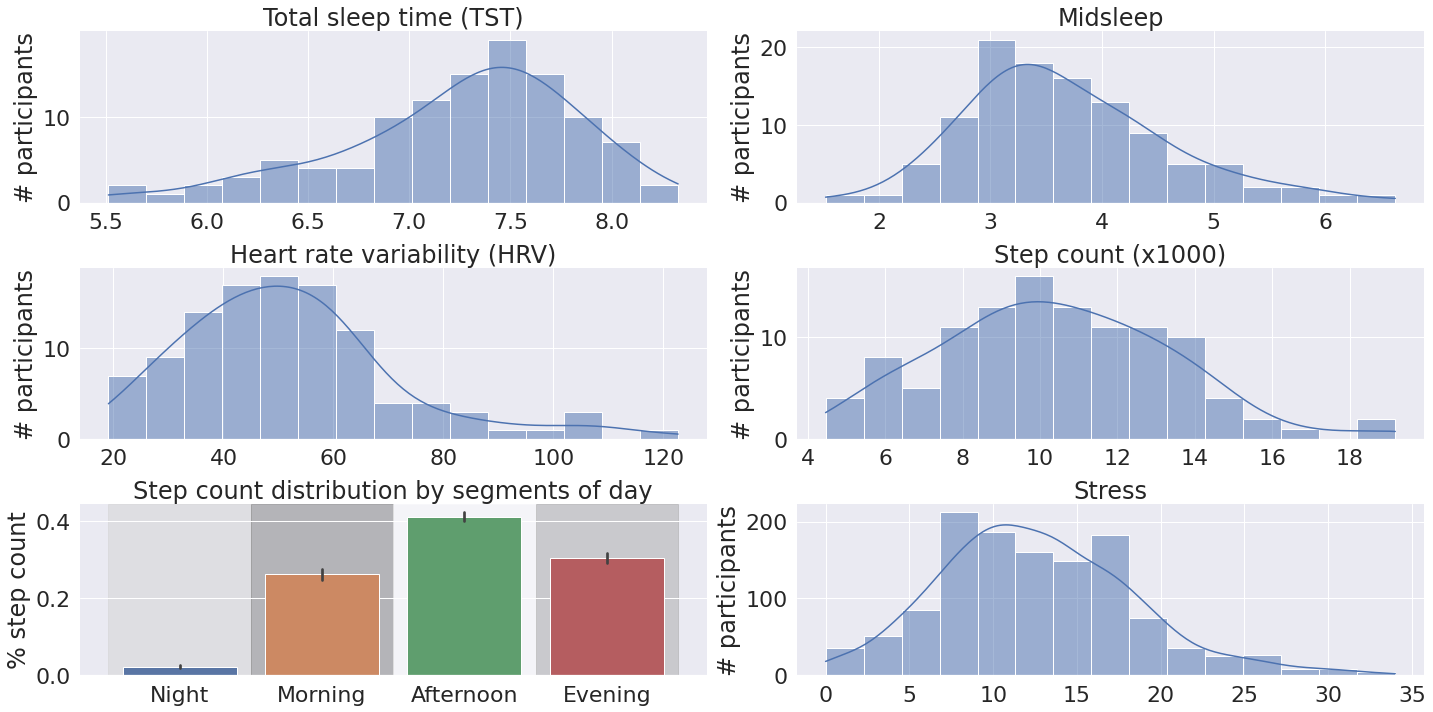

In [11]:
# Set up the matplotlib figure
f, axes = fig, axes = plt.subplot_mosaic("AB;CD;EF", figsize=(20, 10))
f.tight_layout()

sns.despine(left=True)

# Plot a histogram and kernel density estimate for TST
sns.histplot(avg_df["tst"], kde=True, ax=axes["A"], bins=15)
axes["A"].set_title("Total sleep time (TST)")
axes["A"].set_xlabel("")
axes["A"].set_ylabel("# participants")

# Plot a histogram and kernel density estimate for Midsleep
sns.histplot(avg_df["midsleep"], kde=True, ax=axes["B"], bins=15)
axes["B"].set_title("Midsleep")
axes["B"].set_xlabel("")
axes["B"].set_ylabel("# participants")

# Plot a histogram and kernel density estimate for HRV
sns.histplot(avg_df["heart_rate_variability_avg"], kde=True, ax=axes["C"], bins=15)
axes["C"].set_title("Heart rate variability (HRV)")
axes["C"].set_xlabel("")
axes["C"].set_ylabel("# participants")

# Plot a histogram and kernel density estimate for Step Count
sns.histplot(avg_df["stepsx1000:total"], kde=True, ax=axes["D"], bins=15)
axes["D"].set_title("Step count (x1000)")
axes["D"].set_xlabel("")
axes["D"].set_ylabel("# participants")

# Create a bar plot that spans two columns for step counts during different times of the day
# step_counts = avg_df.groupby('subject_id'[['steps:night:norm', 'steps:morning:norm', 'steps:afternoon:norm', 'steps:evening:norm']].mean().reset_index()
step_counts = pd.melt(
    avg_df.reset_index(),
    id_vars=["subject_id"],
    value_vars=[
        "steps:night:norm",
        "steps:morning:norm",
        "steps:afternoon:norm",
        "steps:evening:norm",
    ],
)
sns.barplot(
    x="variable",
    y="value",
    data=step_counts,
    ax=axes["E"],
    errorbar=("se", 2),
)
axes["E"].set_title("Step count distribution by segments of day")
axes["E"].set_xlabel("")

# Rename the y-ticks to show specific times of day
axes["E"].set_xticklabels(["Night", "Morning", "Afternoon", "Evening"])
axes["E"].set_ylabel("% step count")

# Add shaded regions
axes["E"].axvspan(-0.5, 0.5, color="lightgray", alpha=0.5, zorder=0)
axes["E"].axvspan(0.5, 1.5, color="gray", alpha=0.5, zorder=0)
axes["E"].axvspan(1.5, 2.5, color="white", alpha=0.5, zorder=0)
axes["E"].axvspan(2.5, 3.5, color="darkgray", alpha=0.5, zorder=0)

# Stress
# Plot a histogram and kernel density estimate for Midsleep
sns.histplot(survey["PSS"], kde=True, ax=axes["F"], bins=15)
axes["F"].set_title("Stress")
axes["F"].set_xlabel("")
axes["F"].set_ylabel("# participants")

f.subplots_adjust(hspace=0.4)

plt.savefig(VIZ_PATH + "01_corona_description.png", bbox_inches="tight", dpi=300)
plt.tight_layout()
plt.show()